In [1]:
import pandas as pd
import matplotlib.pyplot as plt

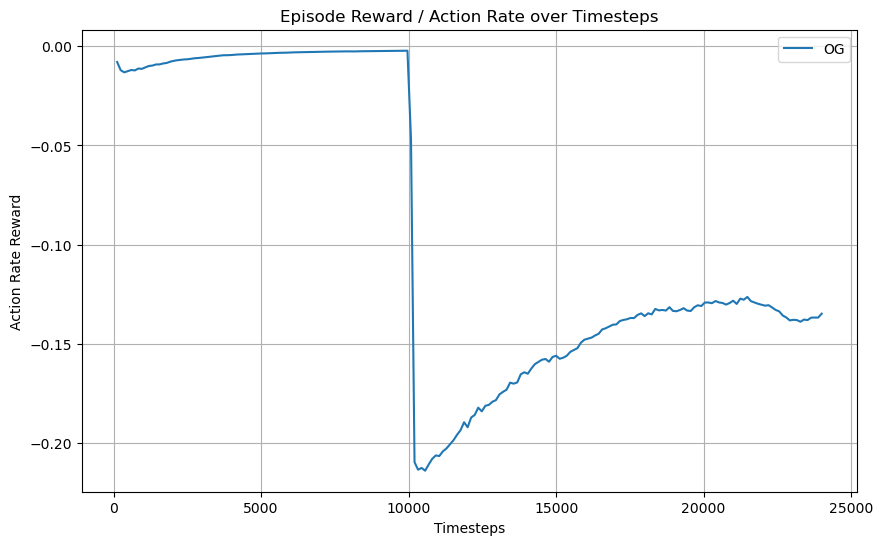

In [10]:

#action rate
# Function to load and plot data from CSV files
def plot_action_rate(file_paths, labels):
    plt.figure(figsize=(10, 6))
    
    for file_path, label in zip(file_paths, labels):
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Assuming columns are named 'Step' and 'Value'
        timesteps = df['Step']
        reward_action_rate = df['Value']
        
        # Plot the data
        plt.plot(timesteps, reward_action_rate, label=label)
    
    # Add labels and title
    plt.xlabel('Timesteps')
    plt.ylabel('Action Rate Reward')
    plt.title('Episode Reward / Action Rate over Timesteps')
    
    # Add legend
    plt.legend()
    
    # Show grid
    plt.grid(True)
    
    # Display the plot
    plt.show()

# Example usage:
file_paths = [
    'data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv',
    #'path_to_your/skrl_lift_2024-09-13_20-44-46-torque-best.csv'
]
#labels = ['OG', 'Torque-Best']
labels = ['OG']

# Call the function to plot
plot_action_rate(file_paths, labels)


        Model   Step      Value
0    OG Model    120   2.125501
1    OG Model    240   1.034547
2    OG Model    360   0.320464
3    OG Model    480   0.434772
4    OG Model    600   0.910224
..        ...    ...        ...
195  OG Model  23520  43.865108
196  OG Model  23640  44.460709
197  OG Model  23760  44.402061
198  OG Model  23880  44.310970
199  OG Model  24000  44.687328

[200 rows x 3 columns]
\begin{tabular}{lr}
\toprule
Model & Final Reward \\
\midrule
OG Model & 44.687328 \\
\bottomrule
\end{tabular}



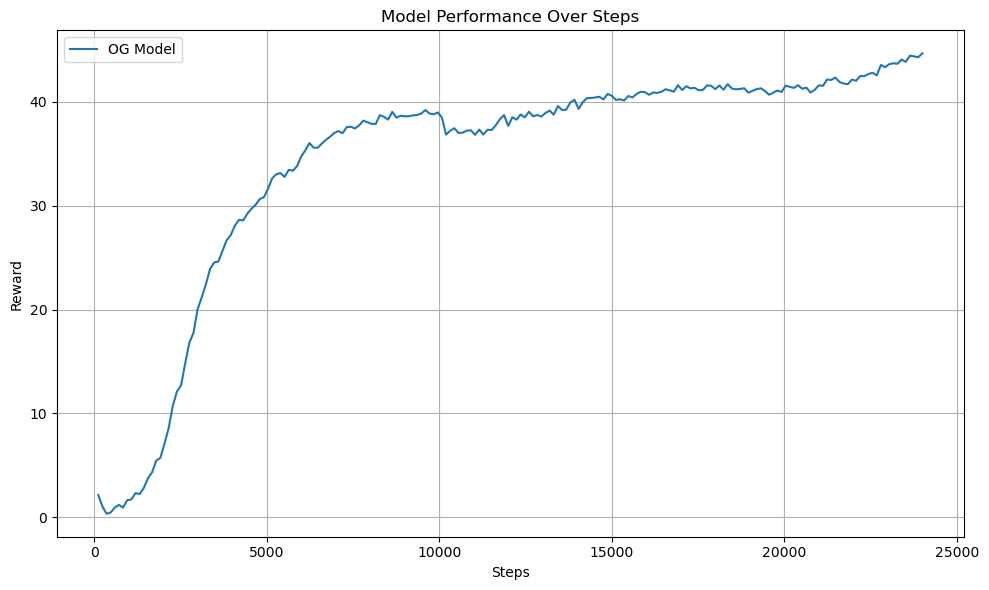

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
# Add the CSV file paths and the corresponding model names
file_paths = [
    'data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv',  # Update with actual paths
    #'path_to_your/another_model.csv'  # Add more file paths as needed
]
model_names = [
    'OG Model',  # Model names corresponding to the CSV files
    #'Another Model'
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Create a DataFrame for the LaTeX table
latex_table_df = final_rewards[['Model', 'Value']].rename(columns={'Value': 'Final Reward'})

# Convert the LaTeX table DataFrame to LaTeX format
latex_table = latex_table_df.to_latex(index=False)
print(latex_table)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Reward')
plt.title('Model Performance Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

                     Model   Step      Value
0    4 Layers Batch Torque    120  -9.856690
1    4 Layers Batch Torque    240 -13.446279
2    4 Layers Batch Torque    360 -14.663562
3    4 Layers Batch Torque    480 -12.657195
4    4 Layers Batch Torque    600 -11.651456
..                     ...    ...        ...
195  4 Layers Batch Torque  23520  -1.875674
196  4 Layers Batch Torque  23640  -1.909284
197  4 Layers Batch Torque  23760  -1.833970
198  4 Layers Batch Torque  23880  -1.804625
199  4 Layers Batch Torque  24000  -1.744331

[200 rows x 3 columns]


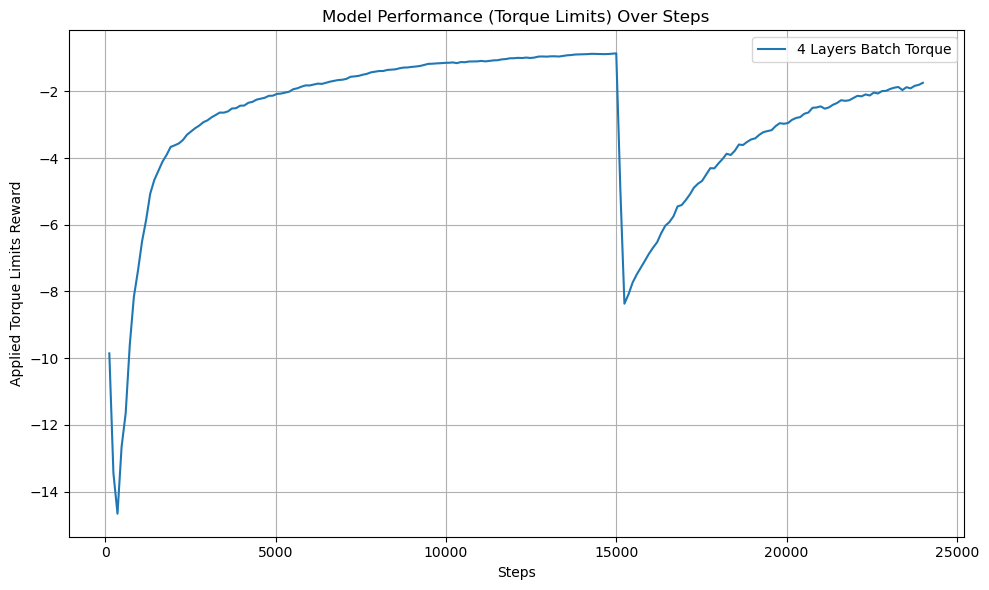

In [11]:
#terque
import pandas as pd
import matplotlib.pyplot as plt

# Function to process a CSV file and return relevant data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Example usage:
file_paths = [
    'data/rewards/torque/skrl_lift_2024-09-17_18-38-18-4layers-batch-torque.csv'  # Replace with actual path
]
model_names = [
    '4 Layers Batch Torque'  # Name corresponding to the file
]

# Create an empty DataFrame to store all the data
results_table = pd.DataFrame()

# Process each file and add to the results table
for file_path, model_name in zip(file_paths, model_names):
    results_table = pd.concat([results_table, process_csv(file_path, model_name)], ignore_index=True)

# Display the results table
print(results_table)

# Extract the final reward for each model
final_rewards = results_table.groupby('Model').apply(lambda x: x.iloc[-1]).reset_index(drop=True)

# Plot the results
plt.figure(figsize=(10, 6))

# Plot each model's data
for model_name in model_names:
    model_data = results_table[results_table['Model'] == model_name]
    plt.plot(model_data['Step'], model_data['Value'], linestyle='-', label=model_name)

# Add labels and title
plt.xlabel('Steps')
plt.ylabel('Applied Torque Limits Reward')
plt.title('Model Performance (Torque Limits) Over Steps')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


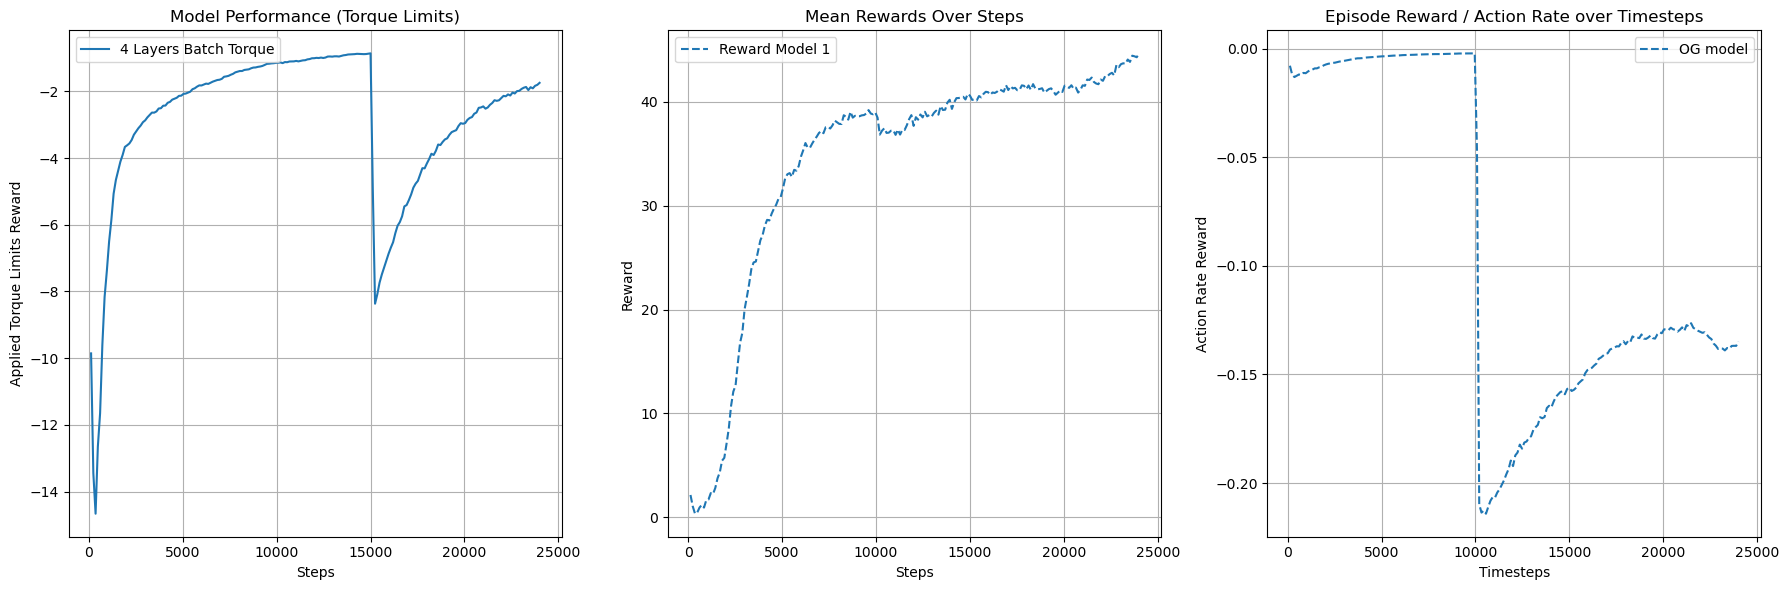

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to process CSV and return data
def process_csv(file_path, model_name):
    # Load the CSV file
    df = pd.read_csv(file_path)
    
    # Extract relevant columns (assuming 'Step' and 'Value' columns exist)
    steps = df['Step']  # Use all steps
    values = df['Value']  # Use all values
    
    # Return a DataFrame with the model name, steps, and values
    return pd.DataFrame({
        'Model': [model_name] * len(steps),
        'Step': steps,
        'Value': values
    })

# Function to plot torque limits reward graph (multiple CSVs can be passed)
def plot_torque_limits(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='-', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Applied Torque Limits Reward')
    ax.set_title('Model Performance (Torque Limits)')
    ax.legend()
    ax.grid(True)

# Function to plot another type of graph (multiple CSVs can be passed)
def plot_action_rate(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='--', label=model_name)

    ax.set_xlabel('Timesteps')
    ax.set_ylabel('Action Rate Reward')
    ax.set_title('Episode Reward / Action Rate over Timesteps')
    ax.legend()
    ax.grid(True)
    
def plot_mean_rewards(ax, csv_paths, model_names):
    for csv_path, model_name in zip(csv_paths, model_names):
        results_table = process_csv(csv_path, model_name)
        ax.plot(results_table['Step'], results_table['Value'], linestyle='--', label=model_name)

    ax.set_xlabel('Steps')
    ax.set_ylabel('Reward')
    ax.set_title('Mean Rewards Over Steps')
    ax.legend()
    ax.grid(True)

# Main plotting function that takes a list of plot functions, csv paths, and model names
def plot_graphs(plot_functions, csv_paths_list, model_names_list):
    num_plots = len(plot_functions)
    fig, axes = plt.subplots(1, num_plots, figsize=(6 * num_plots, 6))
    
    if num_plots == 1:
        axes = [axes]  # Ensure axes is a list if there's only one plot
    
    # Iterate over plot functions and plot them on the respective axis
    for ax, plot_func, csv_paths, model_names in zip(axes, plot_functions, csv_paths_list, model_names_list):
        plot_func(ax, csv_paths, model_names)
    
    plt.tight_layout()
    plt.show()

# Example usage:
# Add the CSV file paths and the corresponding model names for each graph
csv_paths_list = [
    ['data/rewards/torque/skrl_lift_2024-09-17_18-38-18-4layers-batch-torque.csv'],  # Multiple CSVs for torque limits graph
    ['data/mean_rew/skrl_lift_2024-09-13_22-25-30-og-totalRewMean.csv'],# Multiple CSVs for another graph
    ['data/rewards/action-rate/skrl_lift_2024-09-13_22-25-30-og-actionrate.csv']
]
model_names_list = [
    ['4 Layers Batch Torque'],  # Model names for the torque limits graph
    ['Reward Model 1' ],  # Model names for the second graph
    ['OG model']
]

# Define the plotting functions corresponding to each graph
plot_functions = [
    plot_torque_limits,  # First graph (torque limits)
    plot_mean_rewards,  # Second graph (different data)
    plot_action_rate
    
]

# Call the function to plot the graphs
plot_graphs(plot_functions, csv_paths_list, model_names_list)


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'data/inference/Log_with_Epochs.csv'  # Change this to your file path
df = pd.read_csv(file_path)

# Ensure 'Success rate' contains only numeric values
df['Success rate'] = pd.to_numeric(df['Success rate'], errors='coerce')

# Drop rows where 'Success rate' is NaN or invalid
df_clean = df.dropna(subset=['Success rate'])

# Group by epoch and calculate mean, std, and standard error
grouped_clean = df_clean.groupby('Epoch')['Success rate'].agg(['mean', 'std'])
grouped_clean['stderr'] = grouped_clean['std'] / np.sqrt(df_clean['Epoch'].value_counts().sort_index())

# Prepare values for plotting
epochs = grouped_clean.index.to_numpy()
mean = np.nan_to_num(grouped_clean['mean'])
std = np.nan_to_num(grouped_clean['std'])
stderr = np.nan_to_num(grouped_clean['stderr'])

# Plot the graph
plt.figure(figsize=(6, 4))

# Plot the baseline mean line
plt.plot(epochs, mean, label='Baseline', color='blue')

# Fill between for std (light shaded area)
plt.fill_between(epochs, mean - std, mean + std, color='blue', alpha=0.2, label='Std deviation')

# Fill between for standard error (dark shaded area)
plt.fill_between(epochs, mean - stderr, mean + stderr, color='blue', alpha=0.5, label='Std error')

# Adding labels, title, and legend
plt.xlabel('Epoch')
plt.ylabel('Success Rate')
plt.title('Lifting Needle')
plt.legend(loc='best')

# Show the plot
plt.show()


: 